### **Análisis Exploratorio de Datos**

- Importamos las librerias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

- Leemos el archivo csv

In [21]:
df = pd.read_csv('migrantes_mujeres.csv')

- Observamos las primeras filas

In [22]:
df.head()

,Año,Pais,Id_Pais,Mujeres_destino,Mujeres_origen
0,2000,Burundi,BY,51.4,48.8
1,2000,Comoros,COM,52.8,47.6
2,2000,Djibouti,DJI,47.3,42.6
3,2000,Eritrea,ERI,47.1,50.1
4,2000,Ethiopia,ETH,47.3,46.3


- Cambiamos los valores nulos por 0

In [23]:
df = df.fillna(0)

- Reemplazamos los valores * que puedan encontrarse en el nombre del país.

In [24]:
df['Pais'] = df['Pais'].str.replace('*', '')

- Observamos el final del dataframe.

In [25]:
df.tail()

,Año,Pais,Id_Pais,Mujeres_destino,Mujeres_origen
1170,2020,Samoa,WSM,49.5,50.9
1171,2020,Tokelau,TKL,52.7,49.4
1172,2020,Tonga,TON,45.4,50.7
1173,2020,Tuvalu,TUV,44.8,50.5
1174,2020,Wallis and Futuna Islands,WLF,49.5,52.4


- Composición del dataframe.

In [26]:
df.shape

(1175, 5)

- Tipos de datos del dataframe.

In [27]:
df.dtypes

Año                  int64
Pais                object
Id_Pais             object
Mujeres_destino    float64
Mujeres_origen     float64
dtype: object

- Hacemos estadísticas descriptivas de las columnas numéricas.

In [28]:
df.describe()

,Año,Mujeres_destino,Mujeres_origen
count,1175.000000,1175.000000,1175.000000
mean,2010.000000,47.198468,49.874043
std,7.074079,10.036994,7.779217
min,2000.000000,0.000000,0.000000
25%,2005.000000,45.650000,47.700000
50%,2010.000000,49.300000,50.800000
75%,2015.000000,52.000000,53.950000
max,2020.000000,69.900000,65.600000


- Verificamos la existencia de valores nulos

In [29]:
df.isnull().sum()

Año                0
Pais               0
Id_Pais            0
Mujeres_destino    0
Mujeres_origen     0
dtype: int64

- Eliminamos espacios innecesarios.

In [30]:
df['Pais'] = df['Pais'].str.strip()

- Hacemos un top 10 de los paises de origen más populares de las mujeres migrantes.

In [31]:
año = 2020
origen_año = df[df['Año'] == año].sort_values(by='Mujeres_origen', ascending=False)

top_origen_countries = origen_año.head(10)
top_origen_countries[['Pais', 'Mujeres_origen']]

,Pais,Mujeres_origen
1148,Canada,61.4
946,Madagascar,61.3
951,Réunion,61.2
1019,Thailand,61.0
1110,Guadeloupe,60.5
1063,Finland,60.3
994,Saint Helena,59.4
1129,Honduras,59.3
1078,Holy See,59.2
1033,Bahrain,59.2


- Hacemos un top 10 de los paises de destino más populares para las mujeres migrantes.

In [32]:
año = 2020
destino_año = df[df['Año'] == año].sort_values(by='Mujeres_destino', ascending=False)

top_destino_countries = destino_año.head(10)
top_destino_countries[['Pais', 'Mujeres_destino']]

,Pais,Mujeres_destino
1028,Nepal,69.9
1004,"China, Hong Kong SAR",62.6
1081,Montenegro,60.6
999,Kyrgyzstan,59.6
1067,Latvia,59.5
1054,Republic of Moldova,59.1
1031,Armenia,59.0
1082,North Macedonia,58.3
1110,Guadeloupe,58.0
1164,Northern Mariana Islands,58.0


### **Visualizaciones**

- Grafica de barras del top 10 paises de origen más populares.

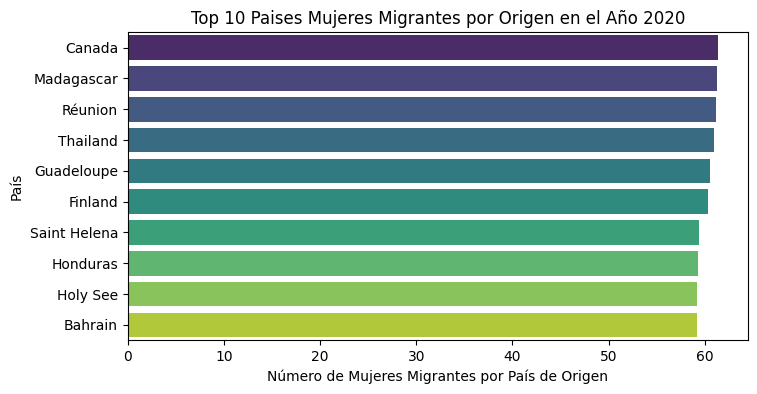

In [33]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_origen_countries, y='Pais', x='Mujeres_origen', palette='viridis')
plt.title("Top 10 Paises Mujeres Migrantes por Origen en el Año 2020")
plt.xlabel("Número de Mujeres Migrantes por País de Origen")
plt.ylabel("País")
plt.show()

- Grafica de barras del top 10 paises de destino más populares.

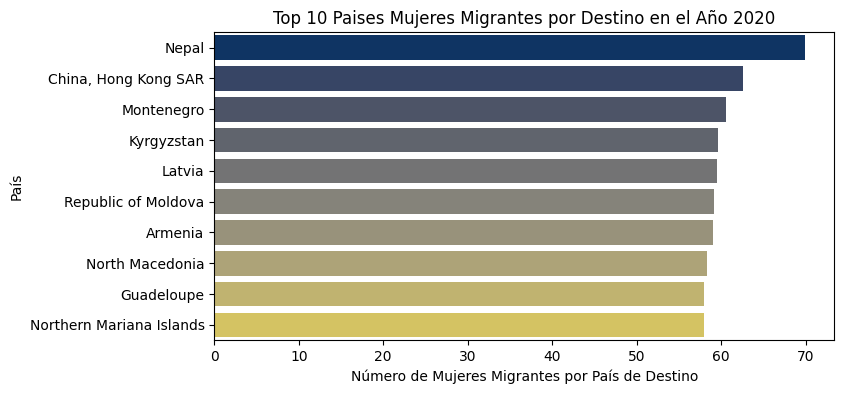

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_destino_countries, y='Pais', x='Mujeres_destino', palette='cividis')
plt.title("Top 10 Paises Mujeres Migrantes por Destino en el Año 2020")
plt.xlabel("Número de Mujeres Migrantes por País de Destino")
plt.ylabel("País")
plt.show()

- Graficos de caja para analizar la distribución de las mujeres migrantes según origen y destino por año.

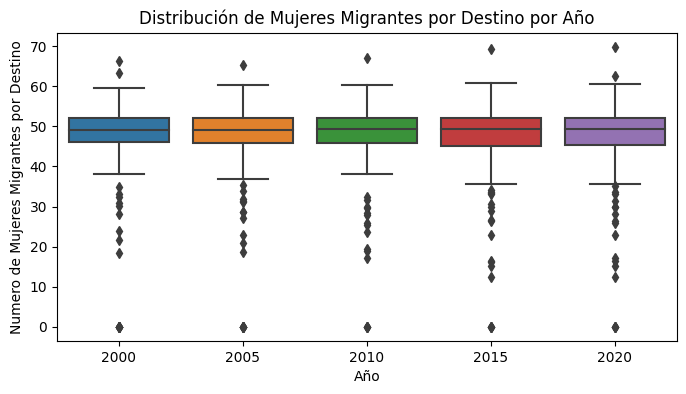

In [35]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Año', y='Mujeres_destino')
plt.title("Distribución de Mujeres Migrantes por Destino por Año")
plt.xlabel("Año")
plt.ylabel("Numero de Mujeres Migrantes por Destino")
plt.show()

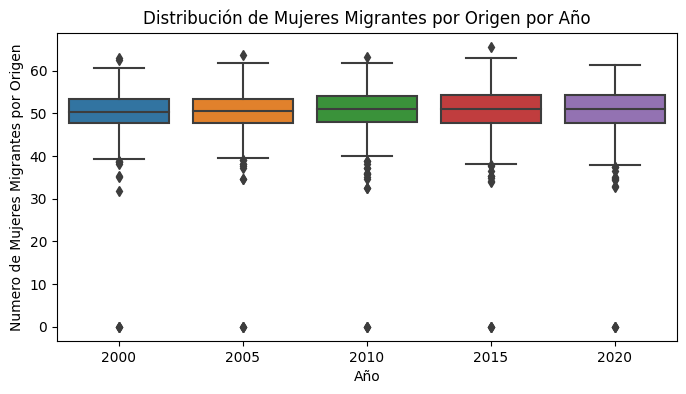

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Año', y='Mujeres_origen')
plt.title("Distribución de Mujeres Migrantes por Origen por Año")
plt.xlabel("Año")
plt.ylabel("Numero de Mujeres Migrantes por Origen")
plt.show()

- Gráfico de líneas para mostrar la evolución de la migración de mujeres a través de los años.

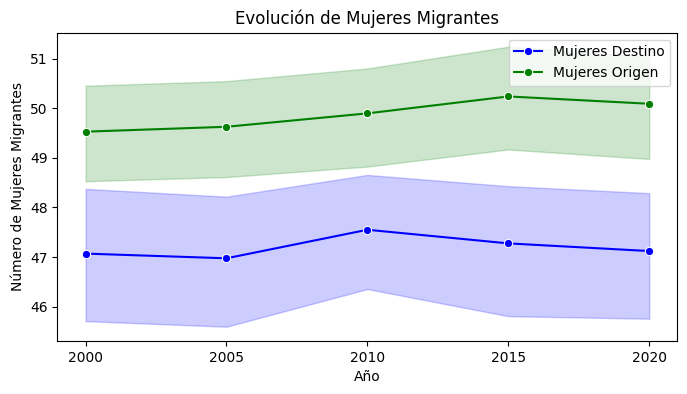

In [37]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Año', y='Mujeres_destino', marker='o', label='Mujeres Destino', color='blue')
sns.lineplot(data=df, x='Año', y='Mujeres_origen', marker='o', label='Mujeres Origen', color='green')
plt.title("Evolución de Mujeres Migrantes")
plt.xlabel("Año")
plt.ylabel("Número de Mujeres Migrantes")
plt.legend()
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

- Mapas para mostrar la distribución de las mujeres migrantes según origen y destino.

Los colores más oscuros demuestran mayor cantidad de migración de mujeres, los colores más claros una menor cantidad de mujeres migrantes.

C:\Users\Angie Arango\AppData\Local\Temp\ipykernel_20560\992649693.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


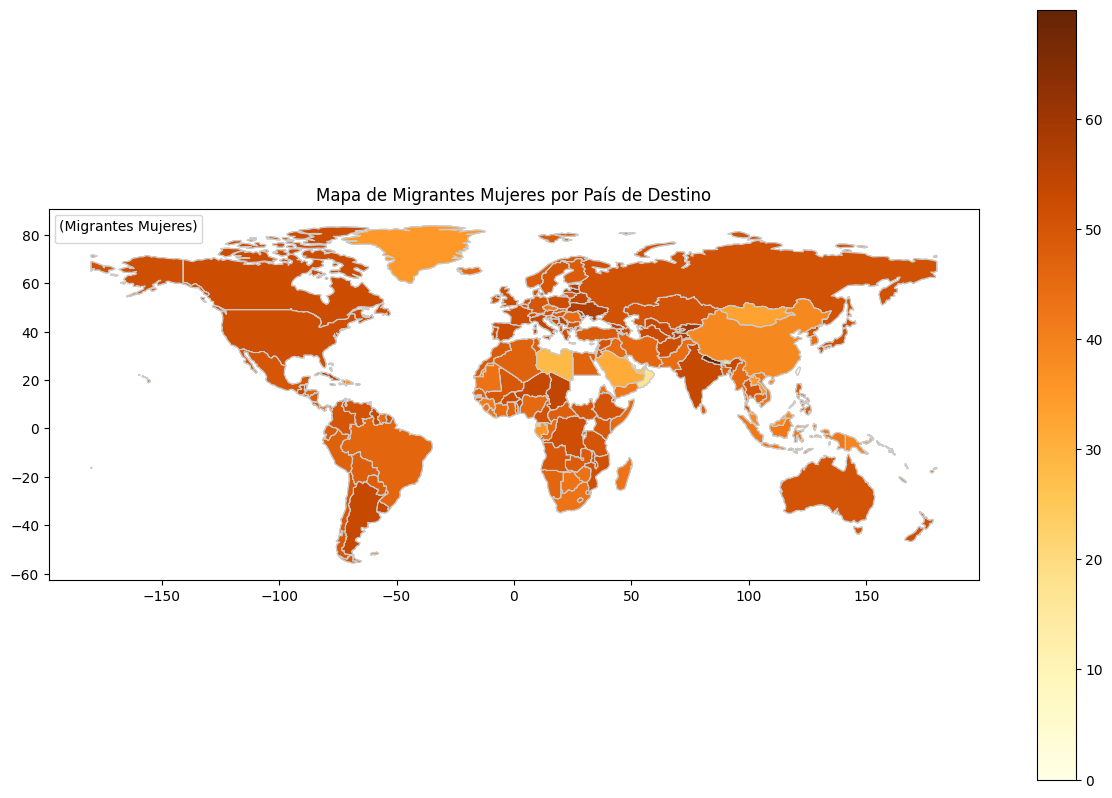

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged = world.merge(df, left_on='iso_a3', right_on='Id_Pais')
merged.plot(column='Mujeres_destino', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Migrantes Mujeres por País de Destino')
legend_labels = [f"{row['Pais']} ({row['Mujeres_destino']})" for idx, row in top_destino_countries.iterrows()]
ax.legend(legend_labels, loc='upper left', fontsize=8, title='(Migrantes Mujeres)')
plt.show()

C:\Users\Angie Arango\AppData\Local\Temp\ipykernel_20560\2082235420.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


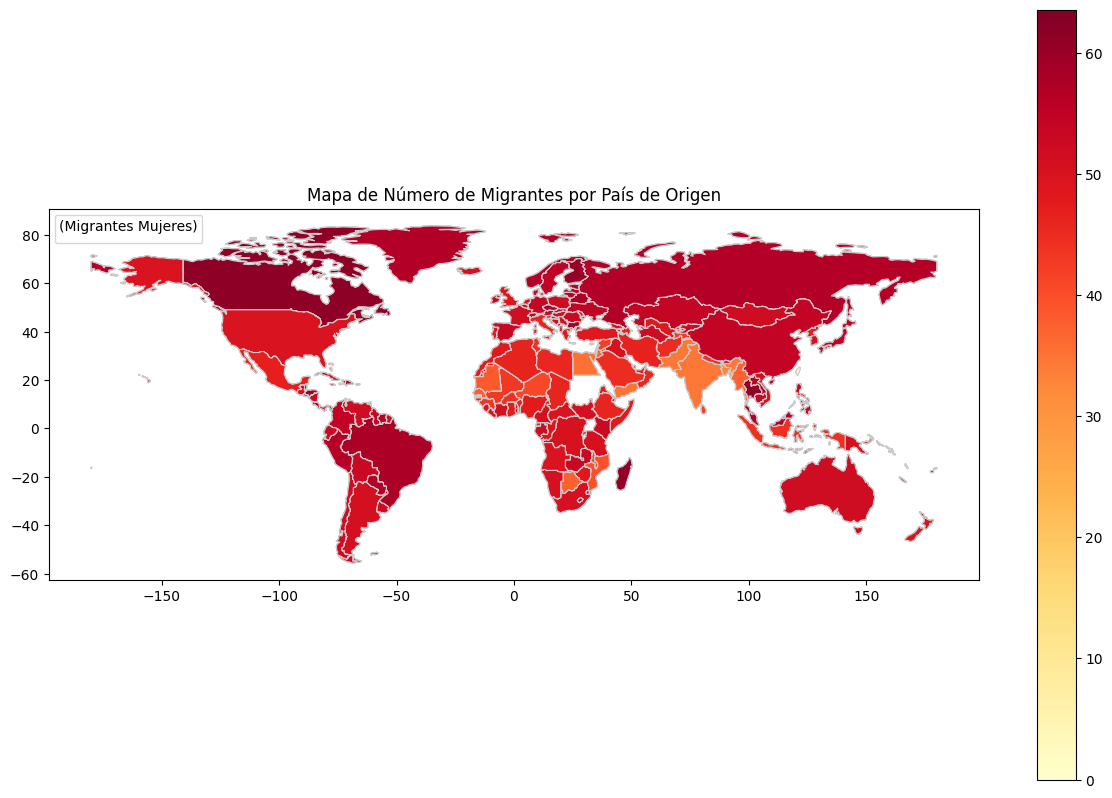

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged = world.merge(df, left_on='iso_a3', right_on='Id_Pais')
merged.plot(column='Mujeres_origen', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Número de Migrantes por País de Origen')
legend_labels = [f"{row['Pais']} ({row['Mujeres_origen']})" for idx, row in top_destino_countries.iterrows()]
ax.legend(legend_labels, loc='upper left', fontsize=8, title='(Migrantes Mujeres)')
plt.show()

### **Conclusión**

El análisis de datos resalta la compleja naturaleza de los *flujos migratorios* y cómo su dinámica es moldeada por una interconexión de diversos factores que impactan en toda la sociedad. En particular, al abordar la paridad de género en las migraciones, hemos identificado un patrón recurrente de participación equitativa de hombres y mujeres en estos desplazamientos. Este enfoque nos ha permitido examinar minuciosamente la evolución de la reubicación de las **mujeres** a lo largo del tiempo como un porcentaje del total de la población de dicho país. Estos hallazgos subrayan la importancia de considerar las dinámicas de género al analizar los movimientos poblacionales y cómo estos fenómenos reflejan y, a su vez, influyen en la sociedad en su conjunto.